Running Clustering Algorithms
Running Dimensionality Reduction Algorithms
Running Anomaly Detection Algorithms


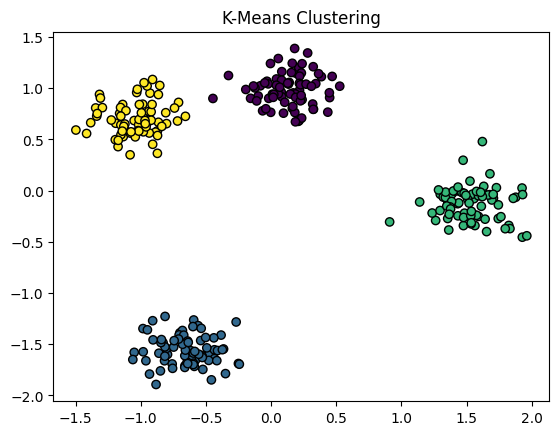

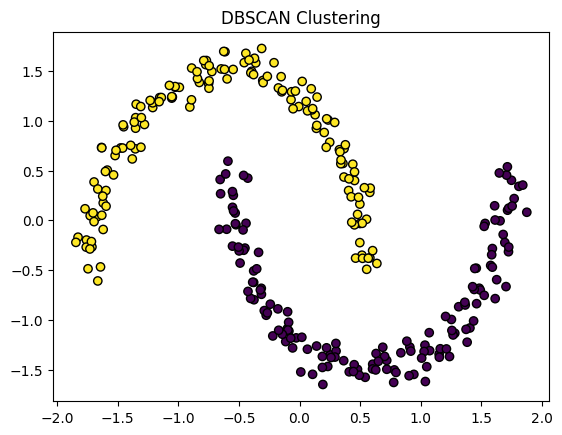

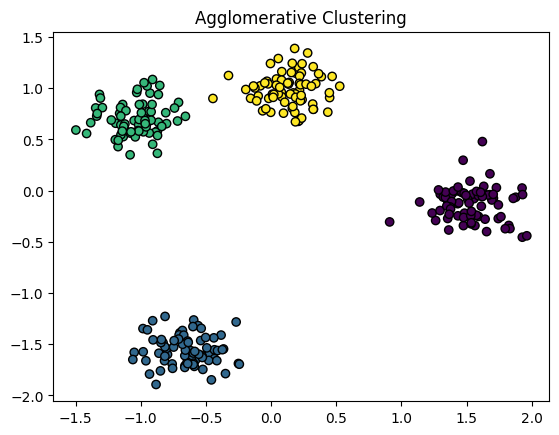

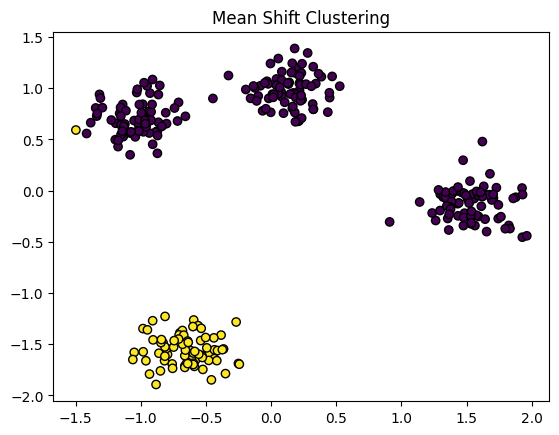

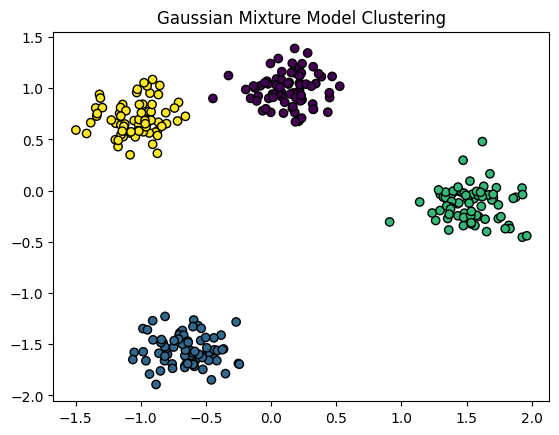

<ipython-input-2-fd6553f3bbcc>:59: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], cmap='viridis', edgecolor='k')


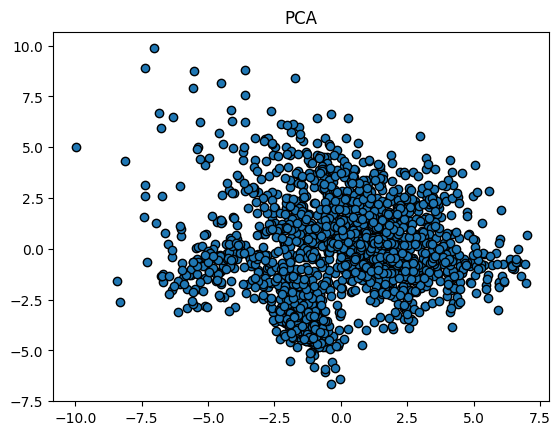

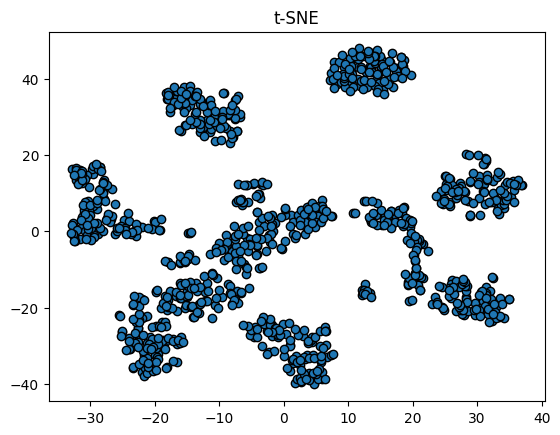

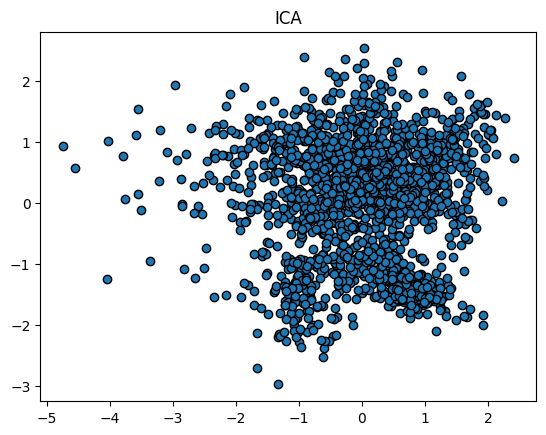

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs, make_moons, load_digits
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, MeanShift
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA, FastICA
from sklearn.manifold import TSNE
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler

# Generate synthetic datasets
dataset_blobs = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)
dataset_moons = make_moons(n_samples=300, noise=0.05, random_state=42)
digits = load_digits()
X_digits = digits.data

# Standardization
scaler = StandardScaler()
X_blobs = scaler.fit_transform(dataset_blobs[0])
X_moons = scaler.fit_transform(dataset_moons[0])
X_digits = scaler.fit_transform(X_digits)

# Clustering Algorithms
print("Running Clustering Algorithms")
kmeans = KMeans(n_clusters=4, random_state=42).fit(X_blobs)
dbscan = DBSCAN(eps=0.3, min_samples=5).fit(X_moons)
agglo = AgglomerativeClustering(n_clusters=4).fit(X_blobs)
meanshift = MeanShift().fit(X_blobs)
gmm = GaussianMixture(n_components=4, random_state=42).fit(X_blobs)

# Dimensionality Reduction Algorithms
print("Running Dimensionality Reduction Algorithms")
pca = PCA(n_components=2).fit_transform(X_digits)
tsne = TSNE(n_components=2, random_state=42).fit_transform(X_digits[:1000])  # Using subset for speed
ica = FastICA(n_components=2, random_state=42).fit_transform(X_digits)

# Anomaly Detection
print("Running Anomaly Detection Algorithms")
iso_forest = IsolationForest(contamination=0.05, random_state=42).fit_predict(X_blobs)
one_svm = OneClassSVM(nu=0.05).fit_predict(X_blobs)

# Plot Clustering Results
def plot_clusters(X, labels, title):
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolor='k')
    plt.title(title)
    plt.show()

plot_clusters(X_blobs, kmeans.labels_, "K-Means Clustering")
plot_clusters(X_moons, dbscan.labels_, "DBSCAN Clustering")
plot_clusters(X_blobs, agglo.labels_, "Agglomerative Clustering")
plot_clusters(X_blobs, meanshift.labels_, "Mean Shift Clustering")
plot_clusters(X_blobs, gmm.predict(X_blobs), "Gaussian Mixture Model Clustering")

# Plot Dimensionality Reduction Results
def plot_dim_reduction(X, title):
    plt.scatter(X[:, 0], X[:, 1], cmap='viridis', edgecolor='k')
    plt.title(title)
    plt.show()

plot_dim_reduction(pca, "PCA")
plot_dim_reduction(tsne, "t-SNE")
plot_dim_reduction(ica, "ICA")


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs, make_moons, load_digits
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, MeanShift
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA, FastICA
from sklearn.manifold import TSNE
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler

In [29]:
# Generate synthetic datasets
dataset_blobs = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)
dataset_moons = make_moons(n_samples=300, noise=0.05, random_state=42)
digits = load_digits()
X_digits = digits.data
df = pd.read_csv('/content/customer_segmentation_dataset.csv')
df
x = ['Age', 'Annual_Income', 'Total_Spent']
df = df[x]

In [7]:
dataset_moons

(array([[ 6.22519125e-01, -3.72101344e-01],
        [ 1.90426932e+00, -1.36302945e-01],
        [-6.94312816e-02,  4.56116985e-01],
        [ 9.33898633e-01,  2.37482827e-01],
        [ 1.18035952e+00, -4.90846917e-01],
        [ 1.02541488e+00, -4.62482874e-01],
        [ 4.11984697e-01, -2.85969715e-01],
        [-6.12663134e-01,  7.29788185e-01],
        [ 9.48145854e-01,  7.95791386e-02],
        [ 1.71242445e-01,  1.58374951e-03],
        [ 1.29201956e+00, -3.77322706e-01],
        [ 3.72211026e-01,  8.92249223e-01],
        [ 9.16250451e-01, -4.88055386e-01],
        [ 6.26278567e-01,  8.66028662e-01],
        [ 1.71157998e-01, -5.55663311e-02],
        [ 9.71527259e-01, -5.27473544e-01],
        [ 1.99307684e+00,  3.03573972e-01],
        [ 7.20383729e-01, -4.16166842e-01],
        [-9.27909913e-01,  2.14482709e-02],
        [ 1.16141211e-01,  2.38388568e-01],
        [-6.21140311e-02,  1.00608737e+00],
        [-7.83123575e-01,  6.13188694e-01],
        [ 1.50215227e+00, -4.123

In [30]:
# Standardization
scaler = StandardScaler()
X_blobs = scaler.fit_transform(dataset_blobs[0])
X_moons = scaler.fit_transform(dataset_moons[0])
X_digits = scaler.fit_transform(X_digits)
df = scaler.fit_transform(df)

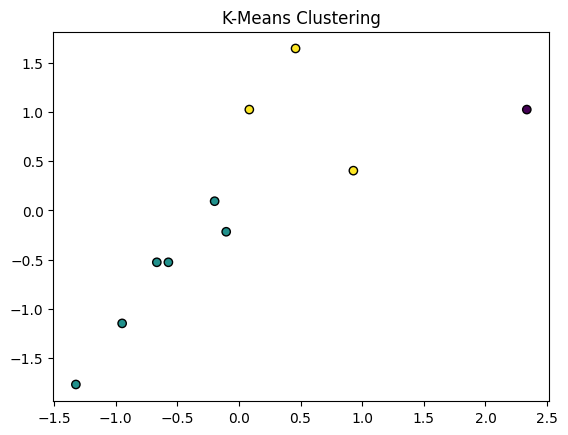

In [32]:
kmeans= KMeans(n_clusters=3,random_state=2).fit(df)
plot_clusters(df, kmeans.labels_, "K-Means Clustering")

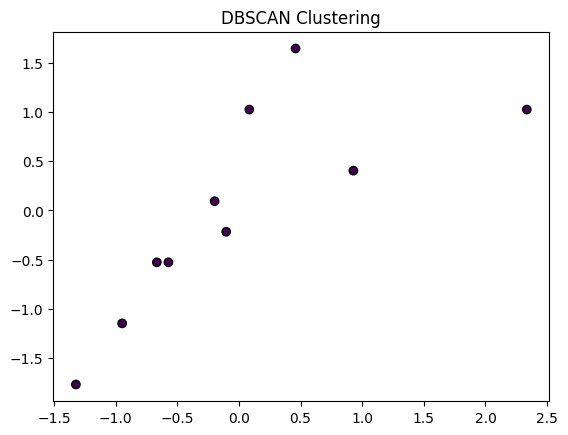

In [34]:
dbscan = DBSCAN(eps=0.1, min_samples=6).fit(df)
plot_clusters(df, dbscan.labels_, "DBSCAN Clustering")

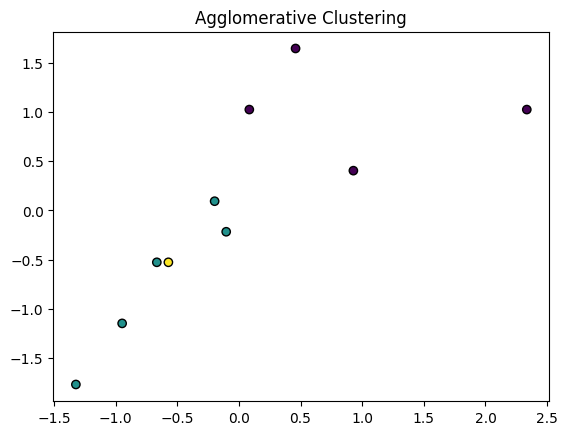

In [35]:
agglo = AgglomerativeClustering(n_clusters=3).fit(df)
plot_clusters(df, agglo.labels_, "Agglomerative Clustering")

In [ ]:
# Clustering Algorithms
print("Running Clustering Algorithms")
kmeans = KMeans(n_clusters=4, random_state=42).fit(X_blobs)
dbscan = DBSCAN(eps=0.3, min_samples=5).fit(X_moons)
agglo = AgglomerativeClustering(n_clusters=4).fit(X_blobs)
meanshift = MeanShift().fit(X_blobs)
gmm = GaussianMixture(n_components=4, random_state=42).fit(X_blobs)

In [25]:
iso_forest = IsolationForest(contamination=0.05, random_state=42).fit_predict(X_blobs)
one_svm = OneClassSVM(nu=0.05).fit_predict(X_blobs)

In [ ]:
# Anomaly Detection
print("Running Anomaly Detection Algorithms")
iso_forest = IsolationForest(contamination=0.05, random_state=42).fit_predict(X_blobs)
one_svm = OneClassSVM(nu=0.05).fit_predict(X_blobs)

In [ ]:
# Plot Clustering Results
def plot_clusters(X, labels, title):
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolor='k')
    plt.title(title)
    plt.show()

In [ ]:
plot_clusters(X_blobs, kmeans.labels_, "K-Means Clustering")
plot_clusters(X_moons, dbscan.labels_, "DBSCAN Clustering")
plot_clusters(X_blobs, agglo.labels_, "Agglomerative Clustering")
plot_clusters(X_blobs, meanshift.labels_, "Mean Shift Clustering")
plot_clusters(X_blobs, gmm.predict(X_blobs), "Gaussian Mixture Model Clustering")

In [26]:
# Plot Dimensionality Reduction Results
def plot_dim_reduction(X, title):
    plt.scatter(X[:, 0], X[:, 1], cmap='viridis', edgecolor='k')
    plt.title(title)
    plt.show()

<ipython-input-26-4454f22ac65f>:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], cmap='viridis', edgecolor='k')


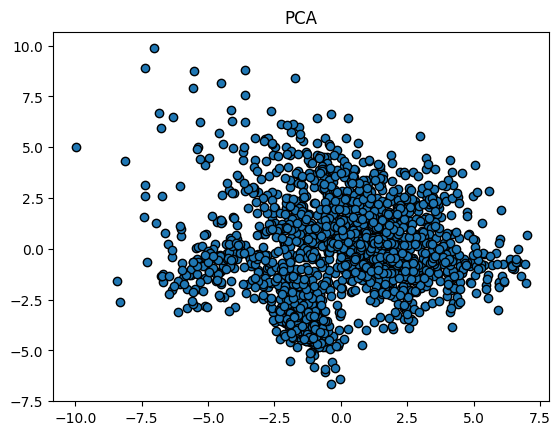

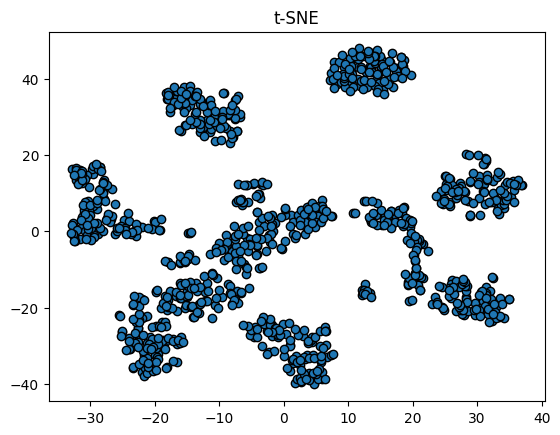

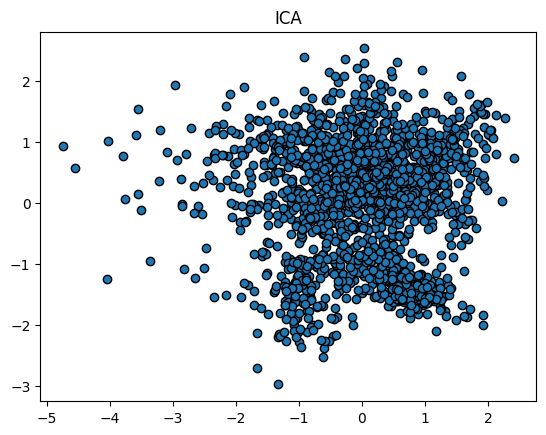

In [27]:
plot_dim_reduction(pca, "PCA")
plot_dim_reduction(tsne, "t-SNE")
plot_dim_reduction(ica, "ICA")

In [ ]:
# Run this notebook on Customer segmentation data
